In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from utils import *

datadir = '/Users/schwarz/Documents/projects/element/research/rto_nime22/user_data/'
p2fam = 'P2/2022-08-30T16-37-21.326Z.txt'
p2exp = 'P2/2022-08-30T16-38-30.262Z.txt'

In [25]:
# old load method
logfilename = datadir + p2exp
df = pd.read_json(logfilename, lines=True)

# split into 3 dataframes by type of line 
datind = df['logtype'] == 'data'
segind = df['logtype'] == 'segment'
evtind = df['logtype'] == 'event'
fbind  = df['logtype'] == 'feedback'

data   = df[datind].dropna(axis=1)
seg    = df[segind].dropna(axis=1)
evt    = df[evtind].dropna(axis=1)
fb     = df[fbind].dropna(axis=1)

(seg['min_dtw_pond'] > 1).cumsum().plot()

In [30]:
# new load method
res0, seg0 = read_log(datadir + p2fam)
res,  seg  = read_log(datadir + p2exp)
seg0 = pd.DataFrame(seg0)
seg  = pd.DataFrame(seg)
seg0

0 {'logtype': 'event', 'timestamp0': 39399, 'event': ['Familiarization']}
0 {'logtype': 'event', 'timestamp0': 108324, 'event': ['Start Condition 1']}
18307 {'logtype': 'event', 'timestamp0': 468323, 'event': ['timer zero']}
18419 {'logtype': 'event', 'timestamp0': 516498, 'event': ['Start Condition 2']}
42796 {'logtype': 'event', 'timestamp0': 876498, 'event': ['timer zero']}


,then,fl,segment_id,worker_0,best_id,min_dtw,min_dtw_pond,model_length,worker_1,avg_dtw,dtw,logtype,random_novelty,condition
0,1349.183463,40,0,1037.862610,0,0.000000,0.000000,0,1037.944207,0.000000,False,segment,-99,c0
1,1537.286319,19,1,1225.226116,1,46.701239,1.583093,1,1226.220957,0.791546,2,segment,-99,c0
2,1774.801357,20,2,1462.748366,2,29.993381,1.538122,2,1463.896458,1.040405,1.47839,segment,-99,c0
3,3002.610127,31,3,2690.696957,3,25.058284,0.705867,3,2692.769270,0.956771,0.73776,segment,-99,c0
4,16891.556503,24,4,16579.768931,4,12.006292,0.436592,4,16581.925669,0.852735,0.511991,segment,-99,c0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,62078.102902,28,95,61766.053719,95,8.218508,0.328740,78,61775.490403,0.665673,0.493847,segment,-99,c0
93,63021.771812,39,96,62709.701221,96,30.605684,0.956428,79,62723.032322,0.668766,1.43014,segment,-99,c0
94,63657.520212,27,98,63345.435806,98,5.299490,0.192709,80,63355.024825,0.663755,0.290331,segment,-99,c0
95,64469.091231,44,99,64157.040423,99,36.463773,1.056921,81,64173.472261,0.667850,1.58257,segment,-99,c0


<AxesSubplot:>

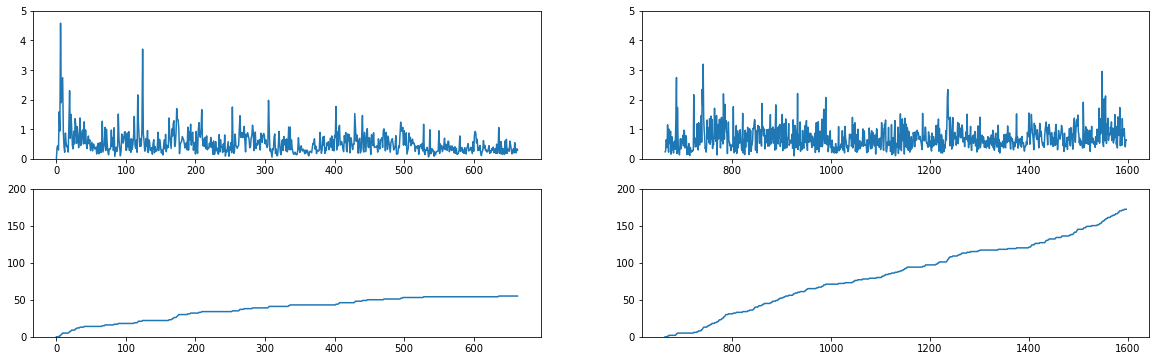

In [50]:
nov0 = select(seg0, condition='c0')
nov1 = select(seg, condition='c1')
nov2 = select(seg, condition='c2')

#ymax = max((nov1['min_dtw_pond'] > 1).cumsum(), (nov2['min_dtw_pond'] > 1).cumsum())
ymax = 200

plt.figure(figsize=(20, 6)) 
plt.subplot(2, 2, 1)
nov1['min_dtw_pond'].plot(ylim=(0, 5))
plt.subplot(2, 2, 2)
nov2['min_dtw_pond'].plot(ylim=(0, 5))
plt.subplot(2, 2, 3)
(nov1['min_dtw_pond'] > 1).cumsum().plot(ylim=(0, ymax))
plt.subplot(2, 2, 4)
(nov2['min_dtw_pond'] > 1).cumsum().plot(ylim=(0, ymax))

(array([  1.,  23.,  61.,  94., 120., 136.,  99.,  95.,  69.,  64.,  48.,
         39.,  18.,  21.,  14.,   9.,   1.,   5.,   4.,   1.,   3.,   3.,
          1.,   2.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
        3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ]),
 <BarContainer object of 50 artists>)

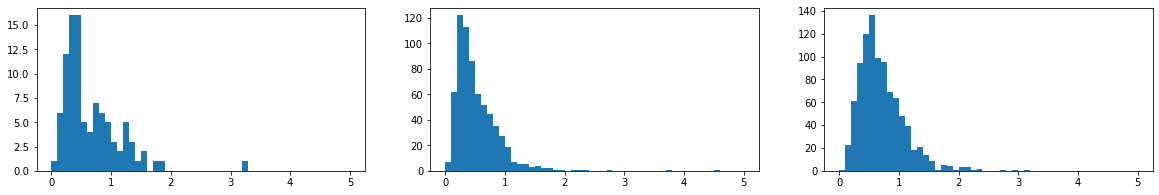

In [42]:
plt.figure(figsize=(20, 3)) 
plt.subplot(1, 3, 1)
plt.hist(nov0['min_dtw_pond'], 50, range=(0, 5))
plt.subplot(1, 3, 2)
plt.hist(nov1['min_dtw_pond'], 50, range=(0, 5))
plt.subplot(1, 3, 3)
plt.hist(nov2['min_dtw_pond'], 50, range=(0, 5))